Arbol de decision dataset Titanic 
John Erik Bayona Salazar
grupo:202016908_34
Tutor: Breyner Alexander Parra


1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [18]:
#importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
#Cargamos el dataset y Realizamos lectura de los datos para el análisis exploratorio
data = pd.read_csv("Titanic-Dataset.csv")
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
#cantidad de filas y columnas
data.shape

(891, 12)

In [26]:
# Descripción de los datos resumen estadistico de las variables
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [29]:
#Identificación de datos faltantes y atipicos
#no se encuentran valores faltantes
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
#Revisión de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Edad: ",data['Age'].isin([0]).sum()) 
print("Cantidad de Registros con cero en cabina: ",data['Cabin'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en cabina:  0


In [35]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

data['Age']=data['Age'].replace('NaN',data['Age'].mean()) #los campos vacios de edad los promediamos con la edad del barco
data['Age']=data['Age'].replace(0,data['Age'].mean()) #Los campos con edad 0 tambien los promediamos

In [37]:
#Revisión nuevamente de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Edad: ",data['Age'].isin([0]).sum()) 

#para contar cuantos datos estan en Vacios
print("Cantidad de Registros vacios en Edad: ",data['Age'].isin(['NaN']).sum()) 

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros vacios en Edad:  0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Clasificacion Pasajeros por Edad')

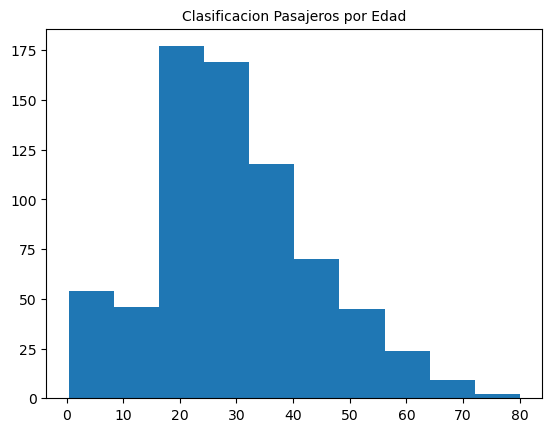

In [51]:
plt.hist(data.Age)
plt.title('Clasificacion Pasajeros por Edad', fontsize=10 )

Text(0.5, 1.0, 'Diagrama de Dispersion')

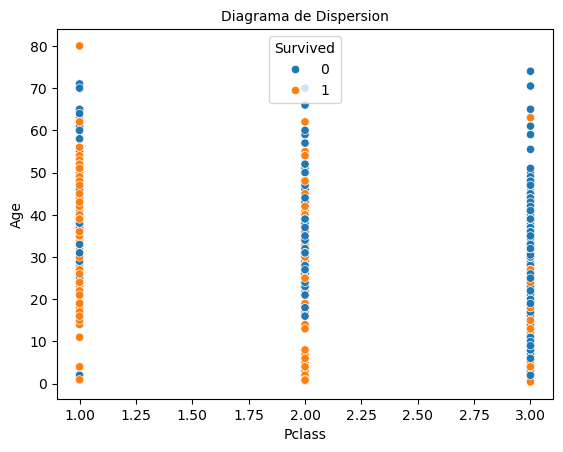

In [53]:
sns.scatterplot(x = "Pclass", y = "Age", hue = "Survived", data = data)
plt.title('Diagrama de Dispersion', fontsize=10 )

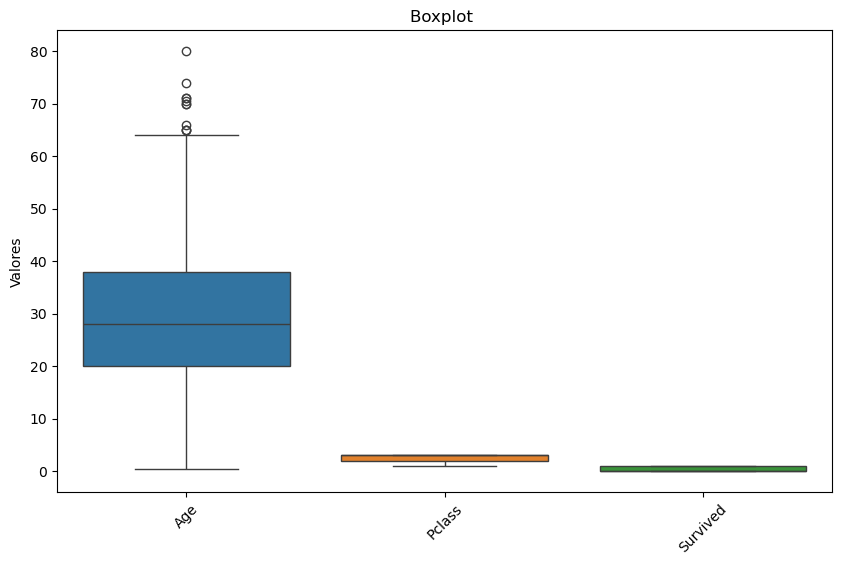

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Pclass', 'Sex', 'Survived']])
plt.xticks(rotation=45)
plt.title('Boxplot ')
plt.ylabel('Valores')
plt.show()

In [75]:
predictors_col = ["Age", "Pclass"]
target_col = ['Survived']

In [77]:
predictors = data[predictors_col]
target = data[target_col]

In [79]:
predictors

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [81]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [83]:
corr = predictors.corr()
corr

,Age,Pclass
Age,1.000000,-0.369226
Pclass,-0.369226,1.000000


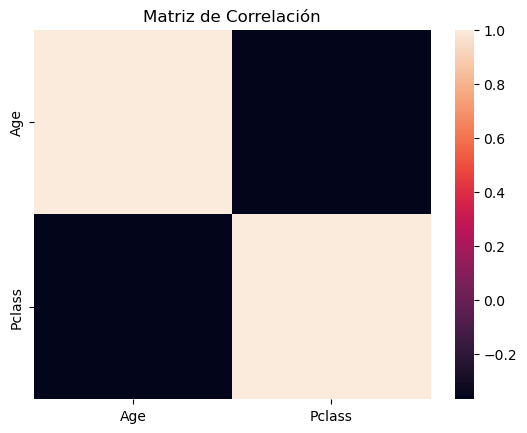

In [85]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [89]:
tree = DecisionTreeClassifier()

In [91]:
arbol = tree.fit(X_train, y_train)

[Text(0.544921875, 0.9782608695652174, 'x[1] <= 2.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.23904718137254902, 0.9347826086956522, 'x[0] <= 17.5\ngini = 0.497\nsamples = 327\nvalue = [151.0, 176.0]'),
 Text(0.056372549019607844, 0.8913043478260869, 'x[0] <= 15.5\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.04656862745098039, 0.8478260869565217, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.0661764705882353, 0.8478260869565217, 'x[1] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.056372549019607844, 0.8043478260869565, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.07598039215686274, 0.8043478260869565, 'x[0] <= 16.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.0661764705882353, 0.7608695652173914, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0857843137254902, 0.7608695652173914, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42172181372549017, 0.8913043478260869, 'x[1] <= 1.5\ngini = 0.5\nsamples = 299\nvalue 

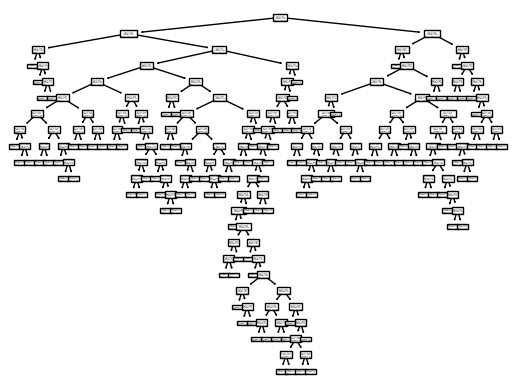

In [93]:
plot_tree(arbol)

In [95]:
predicciones = arbol.predict(X_test)

In [97]:
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [107]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,95,15
1,37,32


In [109]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.7094972067039106

In [111]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.7094972067039106

In [113]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6951542004518311